# Introduction to Pandas

## Learning Goals
- Use Series and DataFrame to work with data
- Create a DataFrame from a list or dictionary or by reading a CSV file
- Inspect a DataFrame
- Access rows, columns and elements
- Subset or filter data
- Make basic plots (bar and line) with matplotlib

## Pandas
Pandas is a fast, powerful, and flexible open source data analysis and maniputation tool built on top of the Python programming language.  Pandas is built for tabular data.  Moreover, it displays data in an intuitive and pleasing way (compared to NumPy, for example).

More documentation can be found here: https://pandas.pydata.org.


### Introduction and Motivation
Why Pandas is better suited for some tasks than NumPy arrays or Python data structures like dictionaries.

In [70]:
# read short CSV file using numpy
import numpy as np

data = np.genfromtxt(
    'example_data.csv', delimiter=';', 
    names=True, dtype=None, encoding='UTF'
)
data

array([('2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia', 'mww', 6.7, 'green', 1),
       ('2018-10-13 04:34:15.580', '25km E of Bitung, Indonesia', 'mww', 5.2, 'green', 0),
       ('2018-10-13 00:13:46.220', '42km WNW of Sola, Vanuatu', 'mww', 5.7, 'green', 0),
       ('2018-10-12 21:09:49.240', '13km E of Nueva Concepcion, Guatemala', 'mww', 5.7, 'green', 0),
       ('2018-10-12 02:52:03.620', '128km SE of Kimbe, Papua New Guinea', 'mww', 5.6, 'green', 1)],
      dtype=[('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')])

In [73]:
data.shape

(5,)

Each of the entries in the array is a row from the CSV file, and in each row, we see several strings, a float and an integer.
To find the maximum magnitude we can use list comprehension to select the third index of each row and then take the maximum.  This is a bit awkward and it would be better to have the data separated in a more understandable representation. 

In [74]:
max([row[3] for row in data])

6.7

We can instead create a dictionary where the keys are the column names (time, place, magType, etc.) and the values are NumPy arrays of the data.  Maybe this is an improvement, but it is still difficuly to parse visually.

In [75]:
array_dict = {
    col: np.array([row[i] for row in data])
    for i, col in enumerate(data.dtype.names)
}
array_dict

{'time': array(['2018-10-13 11:10:23.560', '2018-10-13 04:34:15.580',
        '2018-10-13 00:13:46.220', '2018-10-12 21:09:49.240',
        '2018-10-12 02:52:03.620'], dtype='<U23'),
 'place': array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
        '42km WNW of Sola, Vanuatu',
        '13km E of Nueva Concepcion, Guatemala',
        '128km SE of Kimbe, Papua New Guinea'], dtype='<U37'),
 'magType': array(['mww', 'mww', 'mww', 'mww', 'mww'], dtype='<U3'),
 'mag': array([6.7, 5.2, 5.7, 5.7, 5.6]),
 'alert': array(['green', 'green', 'green', 'green', 'green'], dtype='<U5'),
 'tsunami': array([1, 0, 0, 0, 1])}

In [76]:
# select the mag key fromt he dictionary and use the max() method
array_dict['mag'].max()

6.7

If we want to select al of the information associated with the earthquake with the maximum magnitude, we would need to find the index of the maximum and then for each of the keys in the dictionary, take that item.

### Series

The point of the above examples is that NumPy arrays and dictionaries, though perfectly valid, might not be the best way to store and access data in this form.

The Series class is a data structure for arrays of a single type-- think of it as a single column in a spreadsheet.  Its dimension will always be (n, ) where n is the number of rows.  When created, it includes an **index** (see numbers 0 through 4 in left column below) which enable us to select rows.  Pandas creates a default index, but you can also define another index. 

We can create a series storing the location of each earthquake by using the dictionary we created.


In [77]:
import pandas as pd

# create a Pandas series called place
place = pd.Series(array_dict['place'], name='place')
place

0          262km NW of Ozernovskiy, Russia
1              25km E of Bitung, Indonesia
2                42km WNW of Sola, Vanuatu
3    13km E of Nueva Concepcion, Guatemala
4      128km SE of Kimbe, Papua New Guinea
Name: place, dtype: object

In [16]:
# get dimensions-- will return (rows, columns)
place.shape

(5,)

### DataFrame

The DataFrame class builds on the Series class, and can have many columns, each with its own data type.  You can think of this as an entire spreadsheet.


In [18]:
# create a dataframe from the file we read
df = pd.DataFrame(data)
df

,time,place,magType,mag,alert,tsunami
0,2018-10-13 11:10:23.560,"262km NW of Ozernovskiy, Russia",mww,6.7,green,1
1,2018-10-13 04:34:15.580,"25km E of Bitung, Indonesia",mww,5.2,green,0
2,2018-10-13 00:13:46.220,"42km WNW of Sola, Vanuatu",mww,5.7,green,0
3,2018-10-12 21:09:49.240,"13km E of Nueva Concepcion, Guatemala",mww,5.7,green,0
4,2018-10-12 02:52:03.620,"128km SE of Kimbe, Papua New Guinea",mww,5.6,green,1


Notice the index on the left and the pleasing display of the information compared to the Numpy array or the dictionary above.

In [19]:
# check type of data
df.dtypes

time        object
place       object
magType     object
mag        float64
alert       object
tsunami      int64
dtype: object

In [20]:
# find column names
df.columns

Index(['time', 'place', 'magType', 'mag', 'alert', 'tsunami'], dtype='object')

In [21]:
# see index
df.index

RangeIndex(start=0, stop=5, step=1)

In [22]:
# see dimensions
df.shape

(5, 6)

The above attributes give us a great deal of information about our (small) data set.  We see there are 5 rows and 6 columns, and the columns have titles 'time', 'place', etc.

### Creating Series and DataFrames 

In [23]:
import numpy as np
import pandas as pd

We can create a DataFrame from a Python Data Structure.  In the three examples below, we will create create a DataFrame from a dictionary, from a list of tuples, and from a NumPy array.

In [33]:
# data frame from dictionary
pd.DataFrame(
    {
    'Name' : ['Aaron', 'Luke', 'Kai', 'Casey'],
    'Age' : [23, 21, 22, 21],
    'University' : ['Cal Poly Humboldt', 'Sonoma State', 'UCLA', 'UCD'],
    }, 
   
)

,Name,Age,University
0,Aaron,23,Cal Poly Humboldt
1,Luke,21,Sonoma State
2,Kai,22,UCLA
3,Casey,21,UCD


In [29]:
# data frame from list of tuples
list_of_tuples = [(n, n/2, n**4) for n in range(5)]
list_of_tuples
pd.DataFrame(
    list_of_tuples, 
    columns=['n', 'n/2', 'n^4']
)

,n,n/2,n^4
0,0,0.0,0
1,1,0.5,1
2,2,1.0,16
3,3,1.5,81
4,4,2.0,256


In [30]:
# data frame from NumPy array
pd.DataFrame(
    np.array([
        [0, 0, 0],
        [1, .5, 1],
        [2, 1, 16],
        [3, 1.5, 81],
        [4, 2, 256]
    ]), columns=['n', 'n/2', 'n^4']
)

,n,n/2,n^4
0,0.0,0.0,0.0
1,1.0,0.5,1.0
2,2.0,1.0,16.0
3,3.0,1.5,81.0
4,4.0,2.0,256.0


In [44]:
# data frame from list of dictionaries (as would be seen using an API)
pd.DataFrame([
    {'Median Home Price': 454000, 'Town': 'Arcata'},
     {'Median Home Price': 383000, 'Town': 'Eureka'},
])
# note that the keys of the dictionary become the column names and the values of the dictionary
# become the entries in the data frame

,Median Home Price,Town
0,454000,Arcata
1,383000,Eureka


### Task: 
Create a DataFrame from
- a NumPy array with these entries and columns title "a" and "b":  \begin{bmatrix}
5 & 6 \\
7 & 8 
\end{bmatrix}
- a list of tuples, with the same entries and column names as above
- a dictionary, with the same entries and column names as above

### Solution

In [34]:
# data frame from NumPy array
pd.DataFrame(
    np.array([
        [5, 6],
        [7, 8]  
    ]), columns=['a', 'b', ]
)

,a,b
0,5,6
1,7,8


In [35]:
# data frame from list of tuples
list_of_tuples = [(5, 6), (7, 8)]
list_of_tuples
pd.DataFrame(
    list_of_tuples, 
    columns=['a', 'b']
)

,a,b
0,5,6
1,7,8


In [36]:
# data frame from dictionary
pd.DataFrame(
    {
    'a' : [5, 7],
    'b' : [6, 8],
    }, 
   
)

,a,b
0,5,6
1,7,8


### Example
We can create a data frame with a nested list with the populations of a few European capital cities.  For example, London, the capital of the UK, has a population of 8.615 million in 2015.

In [11]:
df = pd.DataFrame([[909976, 'Sweden'], [8615246, 'UK'], [2872086, 'Italy'], [2273305, 'France']])
df

,0,1
0,909976,Sweden
1,8615246,UK
2,2872086,Italy
3,2273305,France


We can reindex the data frame with the names of the respective capitals, since this might be more intuitive than a numbered index.

In [13]:
df.index = ['Stockholm', 'London', 'Rome', 'Paris']
df

,0,1
Stockholm,909976,Sweden
London,8615246,UK
Rome,2872086,Italy
Paris,2273305,France


We can also rename the columns so the data frame is more understandable.

In [14]:
df.columns = ['Population', 'Country']
df

,Population,Country
Stockholm,909976,Sweden
London,8615246,UK
Rome,2872086,Italy
Paris,2273305,France


### Accessing Columns
We can access a column using attribute notation or by indexing with the column name.  These are equivalent.  Note that a column of a data frame is just a series object.

In [15]:
# option 1, attribute notation
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [17]:
# option 2 indexing notation
df['Population']

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

### Accessing Rows

We can access rows with the loc index attribute.  This will also result in a series object.

In [18]:
# access the row for Stockholm
df.loc['Stockholm']

Population    909976
Country       Sweden
Name: Stockholm, dtype: object

### Subsetting with loc

We can also pass a list of row labels to loc to result in a new data frame that is a subset of the rows of the original.  We can also subset on both rows and columns.

In [19]:
# create new data frame with the rows for Paris and Rome and all columns
df.loc[['Paris', 'Rome']]

,Population,Country
Paris,2273305,France
Rome,2872086,Italy


In [20]:
# create new data frame with rows for Paris and Rome and only the column for Population
df.loc[['Paris', 'Rome'], 'Population']

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

### Descriptive Statistics and Bar Plots


In [23]:
df.mean() # returns mean of numerical columns only

/var/folders/xy/xym_q8_57pz2ff1dhfvmsdb80000gn/T/ipykernel_942/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Population    3667653.25
dtype: float64

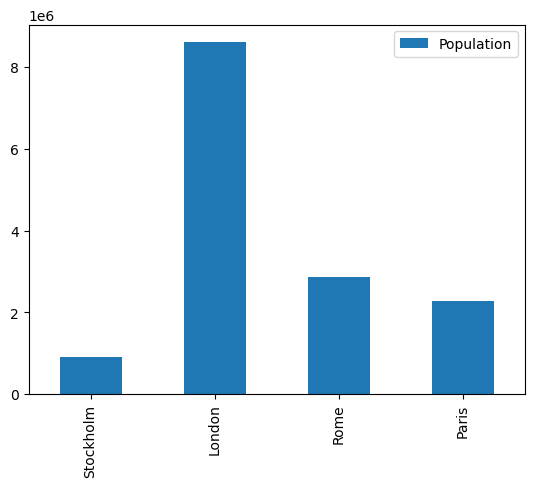

In [26]:
ax = df.plot.bar(y = 'Population') # uses index as x-axis by default

### Task
Look up census data to determine the population of the following cities in Humboldt County: Arcata, Eureka, McKinelyville, Fortuna.  The most recent data available might be from several years ago.
Put this information into a data frame.
- Reindex the data frame with the name of the main public high school in each town.
- Rename the columns appropriately.
- Subset the data frame so you have just the Northern Humboldt Union High School District schools represented (Arcata and McKinleyville).
- Make a bar plot of the population of the towns that contain these schools (just of the towns in the Northern Humboldt Union High School District.


### Solution
From the Census Bureau or Google:
Arcata: 19,114
Eureka: 26,489
McKinelyville: 16,645
Fortuna: 12,482


In [31]:
dfHum = pd.DataFrame([[19114, 'Arcata'], [26489, 'Eureka'], [16645, 'McKinleyville'], [12482, 'Fortuna']])
dfHum.index = ['Arcata High School', 'Eureka High School', 'McKinleyville High School', 'Fortuna High School']
dfHum.columns = ['Population', 'City']
dfHum

,Population,City
Arcata High School,19114,Arcata
Eureka High School,26489,Eureka
McKinleyville High School,16645,McKinleyville
Fortuna High School,12482,Fortuna


In [38]:
dfNorHum = dfHum.loc[['Arcata High School', 'McKinleyville High School']]

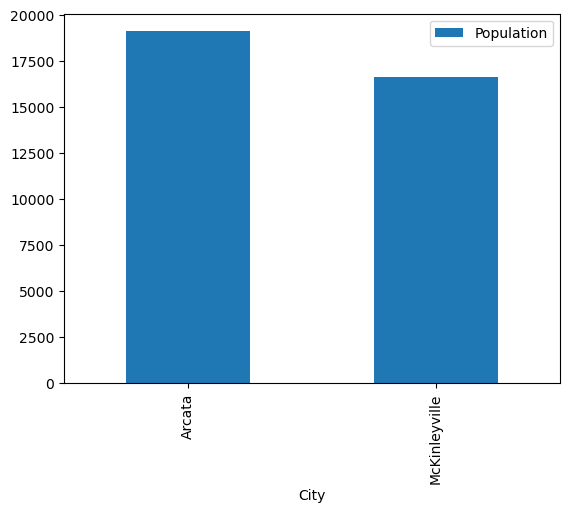

In [39]:
ax = dfNorHum.plot.bar(x = 'City', y = 'Population')

### Creating a DataFrame from a CSV File
The above examples are good to know about, but we generally will not want to hand-enter data into a list of tuples, ndarray, or a dictionary, so reading files is a practical skill.  For this example, we will use the provided earthquake.csv file which contains earthquake data from September 18, 2018 through October 13, 2018 from the USGS earthquake API. (API is an application programming interface).  The API can be accessed here: https://earthquake.usgs.gov/earthquakes/search/.  A CSV file earthquakes.csv has been prepared for you.  

In [1]:
# see how many lines the file is before reading it in
# in a Jupyter notebook, the ! before code runs the command line
!wc -l earthquakes.csv # wc is word count, and -l means count the lines in the file

    9333 earthquakes.csv


In [2]:
# look at the first 3 rows (sepcified by n) of the file
!head -n 3 earthquakes.csv

alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url
,,37389218,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci37389218&format=geojson,0.008693,,85.0,",ci37389218,",1.35,ml,,ci,26.0,"9km NE of Aguanga, CA",0.19,28,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventpage/ci37389218
,,37389202,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci37389202&format=geojson,0.02003,,79.0,",ci37389202,",1.29,ml,,ci,20.0,"9km NE of Aguanga, CA",0.29,26,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventpage/ci37389202


Notice that the file contains headers (alert, cdi, code, etc.), and that it is comma separated.  (Not all CSV files are comma separated, even though CSV stands for comma-separated values.)  We should also check the last few rows to make sure there is not extra information (like a footer).  This can be done with tail.

In [4]:
# look at the last 3 rows (sepcified by n) of the file
!tail -n 3 earthquakes.csv

,,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=pr2018261000&format=geojson,0.4526,,276.0,",pr2018261000,",2.4,md,,pr,9.0,"35km NNE of Hatillo, Puerto Rico",0.41,89,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventpage/pr2018261000
,,38063959,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci38063959&format=geojson,0.01865,,61.0,",ci38063959,",1.1,ml,,ci,27.0,"9km NE of Aguanga, CA",0.1,19,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin,phase-data,scitech-link,",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventpage/ci38063959
,,38063935,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci38063935&format=geojson,0.01698,,39.0,",ci38063935,",0.66,ml,,ci,24.0,"9km NE of Aguanga, CA",0.1,7,",ci,",reviewed,1537228864470,"M 0.7 - 9k

Let's read in the file.  (Put the file in your working directory, or adjust the file path.)  The function read_csv() will do this.  This function can also read data from a URL-- the data does not have to be on your local machine to work.

In [40]:
df = pd.read_csv('earthquakes.csv')
# look at the first 5 rows
df.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...


Notice this is MUCH cleaner to read!

### Inspecting a DataFrame
Once we read our data, we should inspect the dataframe to make sure that the data was read properly.  This also suggests where we might need to direct wrangling actions.  The following commands are a good workflow to get a sense of what our data looks like at an early stage.

In [7]:
# is the data frame empty?  returns true or false
df.empty

False

In [8]:
# what are the dimensions?  (returns as number of rows, number of columns)
df.shape

(9332, 26)

In [9]:
# what are the columns?  We know there are 26, but what are they?
df.columns

Index(['alert', 'cdi', 'code', 'detail', 'dmin', 'felt', 'gap', 'ids', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url'],
      dtype='object')

In [59]:
# we did this previously, but inspecting the top few rows is useful
df.head(3)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...


In [58]:
# as is inspecting the last three rows
df.tail(3)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
9329,NaN,NaN,2018261000,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.45260,NaN,276.0,",pr2018261000,",2.40,md,...,",pr,",reviewed,1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,earthquake,",geoserve,origin,phase-data,",-240.0,1537243777410,https://earthquake.usgs.gov/earthquakes/eventp...
9330,NaN,NaN,38063959,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01865,NaN,61.0,",ci38063959,",1.10,ml,...,",ci,",reviewed,1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537230211640,https://earthquake.usgs.gov/earthquakes/eventp...
9331,NaN,NaN,38063935,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01698,NaN,39.0,",ci38063935,",0.66,ml,...,",ci,",reviewed,1537228864470,"M 0.7 - 9km NE of Aguanga, CA",0,earthquake,",focal-mechanism,geoserve,nearby-cities,origin...",-480.0,1537305830770,https://earthquake.usgs.gov/earthquakes/eventp...


In [60]:
# what data types are included?
df.dtypes

alert       object
cdi        float64
code        object
detail      object
dmin       float64
felt       float64
gap        float64
ids         object
mag        float64
magType     object
mmi        float64
net         object
nst        float64
place       object
rms        float64
sig          int64
sources     object
status      object
time         int64
title       object
tsunami      int64
type        object
types       object
tz         float64
updated      int64
url         object
dtype: object

In [61]:
# info() gives more information, including the number of non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alert    59 non-null     object 
 1   cdi      329 non-null    float64
 2   code     9332 non-null   object 
 3   detail   9332 non-null   object 
 4   dmin     6139 non-null   float64
 5   felt     329 non-null    float64
 6   gap      6164 non-null   float64
 7   ids      9332 non-null   object 
 8   mag      9331 non-null   float64
 9   magType  9331 non-null   object 
 10  mmi      93 non-null     float64
 11  net      9332 non-null   object 
 12  nst      5364 non-null   float64
 13  place    9332 non-null   object 
 14  rms      9332 non-null   float64
 15  sig      9332 non-null   int64  
 16  sources  9332 non-null   object 
 17  status   9332 non-null   object 
 18  time     9332 non-null   int64  
 19  title    9332 non-null   object 
 20  tsunami  9332 non-null   int64  
 21  type     9332 

Since there are 9332 rows, we see that all the ids are non-null (because the non-null count for ids is 9332) but many of the rows have null for alert (since the non-null count fro alert is 59).

### Describing and Summarizing the Data in a First Inspection

In [62]:
# obtain summary statistics
df.describe()

,cdi,dmin,felt,gap,mag,mmi,nst,rms,sig,time,tsunami,tz,updated
count,329.000000,6139.000000,329.000000,6164.000000,9331.000000,93.000000,5364.000000,9332.000000,9332.000000,9.332000e+03,9332.000000,9331.000000,9.332000e+03
mean,2.754711,0.544925,12.310030,121.506588,1.497345,3.651398,19.053878,0.362122,56.899914,1.538284e+12,0.006537,-451.990140,1.538537e+12
std,1.010637,2.214305,48.954944,72.962363,1.203347,1.790523,15.492315,0.317784,91.872163,6.080306e+08,0.080589,231.752571,6.564135e+08
min,0.000000,0.000648,0.000000,12.000000,-1.260000,0.000000,0.000000,0.000000,0.000000,1.537229e+12,0.000000,-720.000000,1.537230e+12
25%,2.000000,0.020425,1.000000,66.142500,0.720000,2.680000,8.000000,0.119675,8.000000,1.537793e+12,0.000000,-540.000000,1.537996e+12
50%,2.700000,0.059050,2.000000,105.000000,1.300000,3.720000,15.000000,0.210000,26.000000,1.538245e+12,0.000000,-480.000000,1.538621e+12
75%,3.300000,0.177250,5.000000,159.000000,1.900000,4.570000,25.000000,0.590000,56.000000,1.538766e+12,0.000000,-480.000000,1.539110e+12
max,8.400000,53.737000,580.000000,355.910000,7.500000,9.120000,172.000000,1.910000,2015.000000,1.539475e+12,1.000000,720.000000,1.539537e+12


Note, this will return statistics for the columns which are numeric.  (It does not make sense to average features like "place").

In [63]:
# if we would like to just describe one column, such as mag (magnitude)
df.mag.describe()

count    9331.000000
mean        1.497345
std         1.203347
min        -1.260000
25%         0.720000
50%         1.300000
75%         1.900000
max         7.500000
Name: mag, dtype: float64

In [65]:
# we can look for unique values in a column
df.alert.unique()

array([nan, 'green', 'red'], dtype=object)

This tells us the categories for alert are either green, red, or nan (null).  If we'd like the number of each, we can use value_counts().

In [66]:
df.alert.value_counts()

green    58
red       1
Name: alert, dtype: int64

### Subsetting Data

- An entire column of a data frame can be grabbed using either attribute notation (e.g., df.mag) or dictionary syntax (e.g., df['mag']).
- Several columns can be selected by using the columns names.  For example, df[['mag', 'place']] will give us a new data frame made of just the columns for magnitude and place.
- Rows can be selected using row number (the first index is included, the last is not).
- Subsets of rows and columns can be selected with chaining.
- As seen above, we can also use loc.

In [94]:
# attribute notation
df.mag

0                      1.35
1                      1.29
2                      3.42
3                      0.44
4                      2.16
               ...         
9327                   0.62
9328                   1.00
9329                   2.40
9330                   1.10
9331                   0.66
Name: mag, Length: 9332, dtype: float64

In [95]:
# dictionary notation
df['mag']

0                      1.35
1                      1.29
2                      3.42
3                      0.44
4                      2.16
               ...         
9327                   0.62
9328                   1.00
9329                   2.40
9330                   1.10
9331                   0.66
Name: mag, Length: 9332, dtype: float64

In [96]:
# selecting multiple columns
df[['mag', 'place']]

,mag,place
0,1.35,"9km NE of Aguanga, CA"
1,1.29,"9km NE of Aguanga, CA"
2,3.42,"8km NE of Aguanga, CA"
3,0.44,"9km NE of Aguanga, CA"
4,2.16,"10km NW of Avenal, CA"
...,...,...
9327,0.62,"9km ENE of Mammoth Lakes, CA"
9328,1.00,"3km W of Julian, CA"
9329,2.40,"35km NNE of Hatillo, Puerto Rico"
9330,1.10,"9km NE of Aguanga, CA"


In [97]:
# select rows 0 through 3
df[0:4]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01,NaN,85.00,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02,NaN,79.00,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.40,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02,28.00,21.00,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.00,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03,NaN,39.00,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...


In [98]:
# chaining to select specific columns and rows
df[['mag', 'place']][0:4] # select colums mag and place and rows 0 through 3

,mag,place
0,1.35,"9km NE of Aguanga, CA"
1,1.29,"9km NE of Aguanga, CA"
2,3.42,"8km NE of Aguanga, CA"
3,0.44,"9km NE of Aguanga, CA"


### Indexing


In [42]:
# loc lets us make these selections without chaining-- note: row index is inclusive with loc
df.loc[0:3, ['mag', 'place']] # select colums mag and place and rows 0 through 3

,mag,place
0,1.35,"9km NE of Aguanga, CA"
1,1.29,"9km NE of Aguanga, CA"
2,3.42,"8km NE of Aguanga, CA"
3,0.44,"9km NE of Aguanga, CA"


### Accessing a Specific Value
If we want to access the magnitude of the earthquake with index 2, we can use at.

In [43]:
df.at[2, 'mag']

3.42

### Filtering
We might be interested only in earthquakes with a magnitude greater than or equal to 7.

In [44]:
# keep only the rows where this boolean statement is true
df[df.mag >= 7]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,green,4.1,1000haa3,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,red,8.4,1000h3p4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


We might also be interested in keeping earthquakes with a magnitude greater than or equal to 7 or earthquakes which caused a tsunami.  We might not need all the columns, so can specifically ask for just the ones we would like to see.

In [45]:
df.loc[
    (df.tsunami == 1) | (df.mag >= 7),
    ['mag', 'title', 'tsunami', 'place']
]

,mag,title,tsunami,place
36,5.0,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,"165km NNW of Flying Fish Cove, Christmas Island"
118,6.7,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,"262km NW of Ozernovskiy, Russia"
501,5.6,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1,"128km SE of Kimbe, Papua New Guinea"
799,6.5,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,"148km S of Severo-Kuril'sk, Russia"
816,6.2,"M 6.2 - 94km SW of Kokopo, Papua New Guinea",1,"94km SW of Kokopo, Papua New Guinea"
...,...,...,...,...
8561,5.4,"M 5.4 - 228km S of Taron, Papua New Guinea",1,"228km S of Taron, Papua New Guinea"
8624,5.1,"M 5.1 - 278km SE of Pondaguitan, Philippines",1,"278km SE of Pondaguitan, Philippines"
9133,5.1,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,"64km SSW of Kaktovik, Alaska"
9175,5.2,"M 5.2 - 126km N of Dili, East Timor",1,"126km N of Dili, East Timor"


We can also subset on earthquakes in California.

In [47]:
df.loc[
    (df.place.str.contains('California')),
    ['mag', 'title', 'tsunami', 'place']
]

,mag,title,tsunami,place
71,0.7,"M 0.7 - 36km ENE of Big Pine, California",0,"36km ENE of Big Pine, California"
84,1.1,"M 1.1 - 14km NE of East Quincy, California",0,"14km NE of East Quincy, California"
96,0.9,"M 0.9 - 60km E of Big Pine, California",0,"60km E of Big Pine, California"
162,1.1,"M 1.1 - 29km ENE of Bridgeport, California",0,"29km ENE of Bridgeport, California"
292,0.6,"M 0.6 - 7km WNW of Tahoe Vista, California",0,"7km WNW of Tahoe Vista, California"
...,...,...,...,...
8974,1.0,"M 1.0 - 41km ESE of Big Pine, California",0,"41km ESE of Big Pine, California"
9140,0.8,"M 0.8 - 54km N of Fort Irwin, California",0,"54km N of Fort Irwin, California"
9162,0.8,"M 0.8 - 14km SSE of Big Pine, California",0,"14km SSE of Big Pine, California"
9235,0.0,"M 0.0 - 60km E of Big Pine, California",0,"60km E of Big Pine, California"


We might have missed some-- the USGS has tagged some locations as California and some as CA.

In [52]:
# same idea but using regular expression
dfCal = df.loc[
    (df.place.str.contains(r'CA|California$')),
    ['mag', 'title', 'tsunami', 'place']
]
dfCal

,mag,title,tsunami,place
0,1.35,"M 1.4 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"
1,1.29,"M 1.3 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"
2,3.42,"M 3.4 - 8km NE of Aguanga, CA",0,"8km NE of Aguanga, CA"
3,0.44,"M 0.4 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"
4,2.16,"M 2.2 - 10km NW of Avenal, CA",0,"10km NW of Avenal, CA"
...,...,...,...,...
9326,1.82,"M 1.8 - 4km W of Julian, CA",0,"4km W of Julian, CA"
9327,0.62,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,"9km ENE of Mammoth Lakes, CA"
9328,1.00,"M 1.0 - 3km W of Julian, CA",0,"3km W of Julian, CA"
9330,1.10,"M 1.1 - 9km NE of Aguanga, CA",0,"9km NE of Aguanga, CA"


### Finding the minimum and maximum
We might be interested in knowing the lowest and highest magnitude earthquakes which occured in California during the time frame the data frame represents, and also knowing where and when they occured.  Pandas lets us find the index of these extrema and then we can select the entire row.

In [53]:
[dfCal.mag.idxmin(), df.mag.idxmax()]

[2510, 5263]

In [55]:
dfCal.loc[
    [dfCal.mag.idxmin(), dfCal.mag.idxmax()],
    ['mag', 'title', 'tsunami', 'place']
]

,mag,title,tsunami,place
2510,-0.50,"M -0.5 - 6km W of Tahoe Vista, California",0,"6km W of Tahoe Vista, California"
1465,3.83,"M 3.8 - 109km WNW of Trinidad, CA",0,"109km WNW of Trinidad, CA"


The largest quake in California in early fall 2018 was actually in Trinidad! 

### Task (Main Course)


The Eviction Lab at Princeton University gathers and provides data on evictions in the United States.  They have constructed a nationwide database of eviction filings, demonstrating that, on average, 2.7 million households are threatened with eviction annually.  The database relied on almost 100 million court records and is available for researchers who want to examine causes and consequences of eviction lawsuits in the United States.  

Having a national perspective is important in understanding how state and local level housing policies relate to eviction risk.  For example, states that require landlords to provide notice to tenants prior to filing an eviction case for nonpayment of rent seem to have lower risk of eviction.  Between 2000 and 2018, almost 7% of renting households faced an eviction lawsuit (Gromis, 2022).

For more in depth information, consider reading the book Evicted: Poverty and Profit in the American City by Matthew Desmond.  This book was a winner of the Pulitzer Prize and was identified as one of the top ten books of 2016 by the New York Times.

Navigate to the Eviction Lab's data downloads site https://data-downloads.evictionlab.org/#estimating-eviction-prevalance-across-us/ and download the csv file state_eviction_estimates_2000_2018.csv.  Put the file in your working directory.

- read the file into a pandas data frame.
- inspect the dataframe by finding
    - is it empty?
    - what are its dimensions?
    - what are the column names?  what data type is each?  
    - some of the columns will not be needed for this exercise, so subset the data frame and retain the columns state, FIPS_state, year, renting_hh, filings_estimate, hh_threat_estimate.
    - Look at the codebook provided on the same site, and make sure you understand what each column name you have retained means.  Write a quick summary.
    - look at the first 3 and last 3 rows.
    - do we have null objects?  If so, summarize where and how many. 
    - get the summary statistics for the entire dataframe
    - get the summary statistics for the column renting_hh (the number of renting households)
- create a data frame that retains just the rows related to California.  Keep the columns 'state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate' only.
    - what year had the minimum number of eviction filings in California between 2000 and 2018 (inclusive)?  How many filings were there that year?
    - what year had the maximum number of eviction filings in California between 2000 and 2018 (inclusive)?  How many filings were there that year?
    - make a line plot for the eviction filings in California (y-axis) for each year (x-axis).  Instead of plot.bar in the previous example, use plot.line.  What trends do you notice?  Write a few sentences describing the number of eviction filings in California over this time period.
    - The graph you created has a significant rise in eviction filings leading up to 2010.  What economic factors might have contributed to this?

California passed a Just Cause Eviction Act in October 2019.  Prior to a state-wide adoption of this policy, many cities in California had just cause eviction ordinances.  For example, East Palo Alto has had an ordinance since 2010 and San Diego has had one since 2004.  New Jersey has had a state-wide Just Cause policy since 1974 (nearly 50 years!).

- create a data frame that retains just the rows related to New Jersey.  Keep the columns 'state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate' only.
   - what year had the minimum number of eviction filings in New Jersey between 2000 and 2018 (inclusive)?  How many filings were there that year?
   - what year had the maximum number of eviction filings in New Jersey between 2000 and 2018 (inclusive)?  How many filings were there that year?
   - make a line plot for the eviction filings in New Jersey (y-axis) for each year (x-axis).  What trends do you notice?  Write a few sentences describing the number of eviction filings in New Jersey over this time period.  Does the graph for New Jersey have a similar rise and peak as the graph for California?  (Note: comparing the numbers of eviction filings between the two states doesn't account for their different population sizes, but looking at the trends in the graph helps us understand what was similar and what was different over this time period.
    
    
- Does this data set feel complete to you?  For example, informal evictions (when landlords induce renters to leave through monetary incentives or illegal lockouts) are not accounted for in this data set.
- There has been some criticism about how the Eviction Lab obtained some of its data.  For example, they purchased California eviction data from American Information Research Services, which offers tenant screening as a service.  Some critics (e.g., Anti-Eviction Mapping Project, Tenants Together) suggest this purchased data vastly undercounts the number of evictions that have been filed. Discuss the implications of this undercounting in terms of analysis and policy.  (A few sentences is sufficient.)

### Solution

In [56]:
df = pd.read_csv('state_eviction_estimates_2000_2018.csv')


In [74]:
df.empty

False

In [75]:
df.shape

(969, 12)

In [77]:
df.columns

Index(['state', 'FIPS_state', 'year', 'renting_hh', 'filings_estimate',
       'filings_ci_95_lower', 'filings_ci_95_upper',
       'ind_filings_court_issued', 'ind_filings_court_issued_LT',
       'hh_threat_estimate', 'hh_threat_95_lower', 'hh_threat_95_upper'],
      dtype='object')

In [81]:
# subset to retain columns as instructed
df2 = df[['state', 'FIPS_state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate']]

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               969 non-null    object
 1   FIPS_state          969 non-null    int64 
 2   year                969 non-null    int64 
 3   renting_hh          969 non-null    int64 
 4   filings_estimate    969 non-null    int64 
 5   hh_threat_estimate  969 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 45.5+ KB


By looking at the codebook, we can interpret the column names which are unclear
- FIPS_state is the state FIPS code.  Using google, we can get a further definition: Federal Information Processing System (FIPS) codes are numbers which uniquely identify geographic areas. The state FIPS codes correspond with the states in alphabetical order (e.g., California has code 06).
- renting_hh is number of renting households
- filings_estimate is estimated number of filings
- hh_threat is the estimated number of households threatened with eviction

In [85]:
# look at the first 3 rows
df2.head(3)

,state,FIPS_state,year,renting_hh,filings_estimate,hh_threat_estimate
0,Alabama,1,2000,478375,17636,16815
1,Alabama,1,2001,487658,18248,17329
2,Alabama,1,2002,496940,18748,17846


In [86]:
df2.tail(3)

,state,FIPS_state,year,renting_hh,filings_estimate,hh_threat_estimate
966,Wyoming,56,2016,81496,1464,1376
967,Wyoming,56,2017,83445,1400,1318
968,Wyoming,56,2018,85394,1282,1218


In [87]:
# summary statistics
df2.describe()

,FIPS_state,year,renting_hh,filings_estimate,hh_threat_estimate
count,969.000000,969.000000,9.690000e+02,969.000000,969.000000
mean,28.960784,2009.000000,7.985399e+05,71892.153767,53116.658411
std,15.684931,5.480054,9.842588e+05,107710.813406,66573.901656
min,1.000000,2000.000000,5.809400e+04,474.000000,457.000000
25%,16.000000,2004.000000,1.948040e+05,9004.000000,8194.000000
50%,29.000000,2009.000000,5.211200e+05,26740.000000,22767.000000
75%,42.000000,2014.000000,9.550390e+05,100004.000000,78743.000000
max,56.000000,2018.000000,6.087863e+06,655019.000000,328473.000000


Even though FIPS is a number, the summary statistics are not meaningful.

In [89]:
# summary statistics of one column
df2.renting_hh.describe()

count    9.690000e+02
mean     7.985399e+05
std      9.842588e+05
min      5.809400e+04
25%      1.948040e+05
50%      5.211200e+05
75%      9.550390e+05
max      6.087863e+06
Name: renting_hh, dtype: float64

In [91]:
# easier to compare without scientific notation
pd.options.display.float_format = '{:20,.2f}'.format
df2.renting_hh.describe()

count                 969.00
mean              798,539.88
std               984,258.78
min                58,094.00
25%               194,804.00
50%               521,120.00
75%               955,039.00
max             6,087,863.00
Name: renting_hh, dtype: float64

In [57]:
dfCali = df.loc[(df.state.str.contains(r'CA|California$')),
                ['state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate']]
dfCali

,state,year,renting_hh,filings_estimate,hh_threat_estimate
76,California,2000,4956536,157225,152359
77,California,2001,5015095,175805,168942
78,California,2002,5073654,178246,172097
79,California,2003,5132213,187620,180748
80,California,2004,5190772,180224,175062
81,California,2005,5249332,159652,155609
82,California,2006,5307891,158680,154698
83,California,2007,5366450,174709,169442
84,California,2008,5425009,202053,195389
85,California,2009,5483568,214945,207435


In [59]:
dfCali.loc[
    [dfCali.filings_estimate.idxmin(), dfCali.filings_estimate.idxmax()],
    ['state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate']
]

,state,year,renting_hh,filings_estimate,hh_threat_estimate
94,California,2018,6087863,132901,129639
86,California,2010,5542127,221841,214775


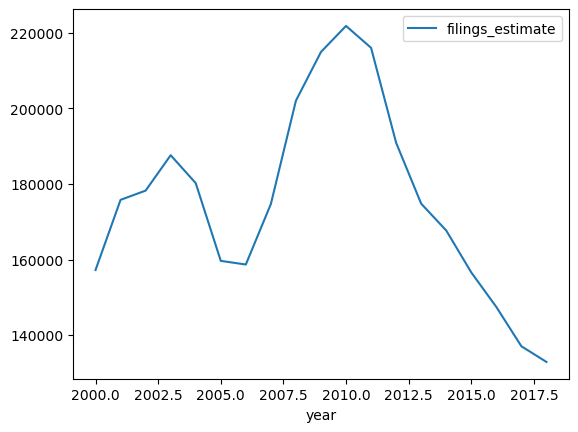

In [64]:
ax = dfCali.plot.line(x = 'year', y = 'filings_estimate')


In [65]:
dfNJ = df.loc[(df.state.str.contains(r'NJ|New Jersey$')),
                ['state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate']]
dfNJ

,state,year,renting_hh,filings_estimate,hh_threat_estimate
570,New Jersey,2000,1053172,88880,68746
571,New Jersey,2001,1059044,126559,90008
572,New Jersey,2002,1064917,140285,99466
573,New Jersey,2003,1070789,130553,94708
574,New Jersey,2004,1076661,132668,99771
575,New Jersey,2005,1082534,156879,116956
576,New Jersey,2006,1088406,157605,117327
577,New Jersey,2007,1094278,149277,110235
578,New Jersey,2008,1100150,156370,115110
579,New Jersey,2009,1106023,172832,122991


In [69]:
dfNJ.loc[
    [dfNJ.filings_estimate.idxmin(), dfNJ.filings_estimate.idxmax()],
    ['state', 'year', 'renting_hh', 'filings_estimate', 'hh_threat_estimate']
]

,state,year,renting_hh,filings_estimate,hh_threat_estimate
570,New Jersey,2000,1053172,88880,68746
581,New Jersey,2011,1130833,185514,132354


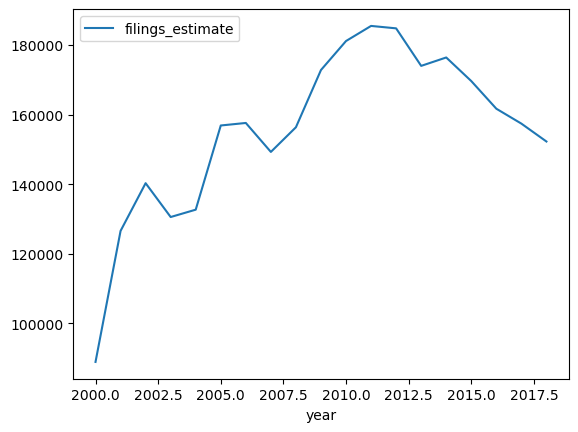

In [67]:
ax = dfNJ.plot.line(x = 'year', y = 'filings_estimate')

### References
- Hands on Data Analysis with Pandas by Stefanie Molin
- Gromis, Ashley, Ian Fellows, James R. Hendrickson, Lavar Edmonds, Lillian Leung, Adam Porton, and Matthew Desmond. Estimating Eviction Prevalence across the United States. Princeton University Eviction Lab. https://data-downloads.evictionlab.org/#estimating-eviction-prevalance-across-us/. Deposited May 13, 2022.
- Evicted: Poverty and Profit in the American City by Matthew Desmond.
- Cuellar, Julieta. "Effect of “just cause” eviction ordinances on eviction in four California cities." Journal of Public & International Affairs 30 (2019).  https://jpia.princeton.edu/news/effect-just-cause-eviction-ordinances-eviction-four-california-cities
- California Tenant Protection Act of 2019 (AB1482): https://leginfo.legislature.ca.gov/faces/billTextClient.xhtml?bill_id=201920200AB1482